In [1]:
import pandas as pd

In [9]:
data=pd.read_csv('SMSSpamCollection.tsv', sep='\t')
data.columns=['label', 'body_text']

text len feature

In [10]:
data['body_len']=data['body_text'].apply(lambda x:len(x)-x.count(' '))
data.head()

,label,body_text,body_len
0,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128
1,ham,"Nah I don't think he goes to usf, he lives aro...",49
2,ham,Even my brother is not like to speak with me. ...,62
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28
4,ham,As per your request 'Melle Melle (Oru Minnamin...,135


% of char that are punctuation as feature

In [39]:
import string
def count_punct(text):
    count=sum([1 for char in text if char in string.punctuation])
    return round(float(count)/(len(text)-text.count(" ")),3)*100

data['puct%'] = data['body_text'].apply(lambda x: count_punct(x))
data.head()
                 

,label,body_text,body_len,puct%
0,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128,4.7
1,ham,"Nah I don't think he goes to usf, he lives aro...",49,4.1
2,ham,Even my brother is not like to speak with me. ...,62,3.2
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28,7.1
4,ham,As per your request 'Melle Melle (Oru Minnamin...,135,4.4


# Evaluate created features

In [40]:
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline

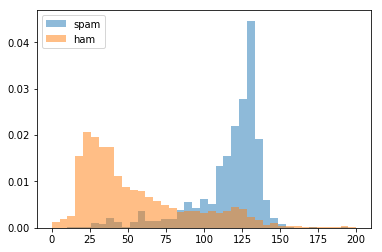

In [41]:
bins=np.linspace(0,200,40)
plt.hist(data[data['label']=='spam']['body_len'], bins, alpha=0.5,
         normed=True, label='spam')
plt.hist(data[data['label']=='ham']['body_len'], bins, alpha=0.5,
         normed=True, label='ham')
plt.legend(loc='upper left')
plt.show()

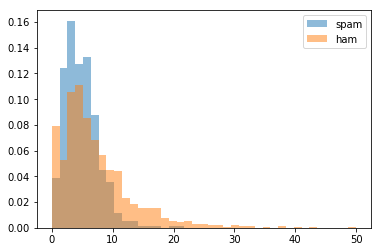

In [42]:
bins=np.linspace(0,50,40)
plt.hist(data[data['label']=='spam']['puct%'], bins, alpha=0.5,
         normed=True, label='spam')
plt.hist(data[data['label']=='ham']['puct%'], bins, alpha=0.5,
         normed=True, label='ham')
plt.legend(loc='upper right')
plt.show()

# Transformation

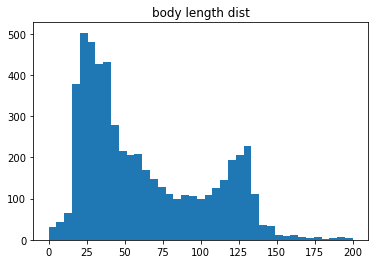

In [43]:
bins=np.linspace(0,200,40)
plt.hist(data['body_len'], bins)
plt.title('body length dist')
plt.show()

This dist seems ok as two peak for spam & ham & well distributed 

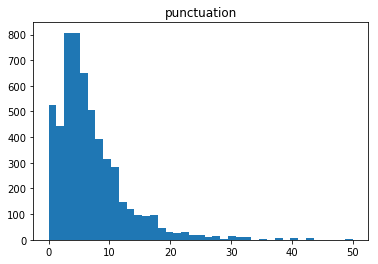

In [44]:
bins=np.linspace(0,50,40)
plt.hist(data['puct%'], bins)
plt.title('punctuation')
plt.show()

this needs transfromation as it is left skewed and some outlier value as the end

In [53]:
data.dtypes

label         object
body_text     object
body_len       int64
puct%        float64
dtype: object

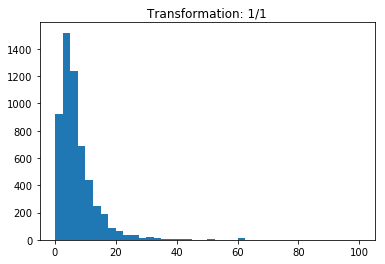

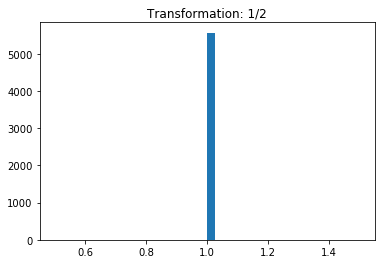

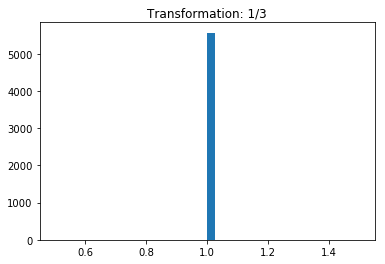

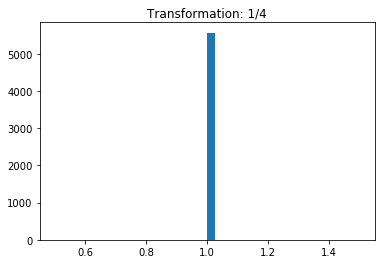

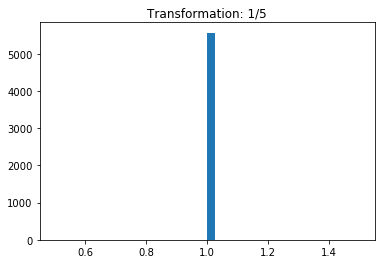

In [47]:
for i in [1, 2, 3, 4, 5]:
    plt.hist((data['puct%'])**(float(1)/i), bins=40)
    plt.title('Transformation: 1/{}'.format(str(i)))
    plt.show()

In [52]:
for i in [1,2,3,4]:
    print(float(2.3)**float(1/i))

2.3
1.0
1.0
1.0


In [55]:
2.0**1/2

1.0

In [57]:
import math
math.pow(2.0, 1/2)

1.0

In [67]:
2**(1.0/2)

1.4142135623730951